In [206]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def TurningPoints(price_series, step_size=10, interpolation_kind='cubic', plot=True):
    ''' Returns Tops and Bottoms of the inputed price series as a tuple
    '''
    # get smoothed curve
    x = np.arange(0,len(price_series),step_size)
    f = interp1d(x, asset.values[::step_size], bounds_error=False, kind=interpolation_kind)
    
    # use forward finite difference method to calculate first derivative
    x = np.arange(0,len(price_series))
    y = f(x)
    dy = [0.0]*len(x)
    for i in range(len(x)-1):
        dy[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
    dy[-1] = (y[-1]-y[-2])/(x[-1]-x[-2])

    # quick and dirty way to get bottoms and tops without calculating 2nd derivative
    bottoms = []
    tops = []
    prev = dy[0]
    for i in range(1,len(x)):
        if prev < 0 and dy[i] > 0: bottoms.append(i)
        elif prev > 0 and dy[i] < 0: tops.append(i)
        prev = dy[i]
    
    if plot:
        _, ax = plt.subplots(3, sharex=True)
        ax[0].plot(price_series)
        ax[0].set_title('Share Price')
        ticks = ax[0].get_xticks()
        ax[0].set_xticklabels([price_series.index[i].date() for i in ticks[:-1]]) # Label x-axis with dates

        ax[1].plot(dy)
        ax[1].set_title('1st Derivative of Share Price')

        ax[2].plot(price_series)
        ax[2].set_title('Share Price with Turning Points')
        ax[2].plot(x[bottoms], y[bottoms], 'gD')
        ax[2].plot(x[tops], y[tops], 'rD')

    return (bottoms, tops)

In [210]:
start = '2014-01-01'
end = '2016-04-20'
asset = get_pricing('SPY', fields='price', start_date=start, end_date=end)
dates = asset.index


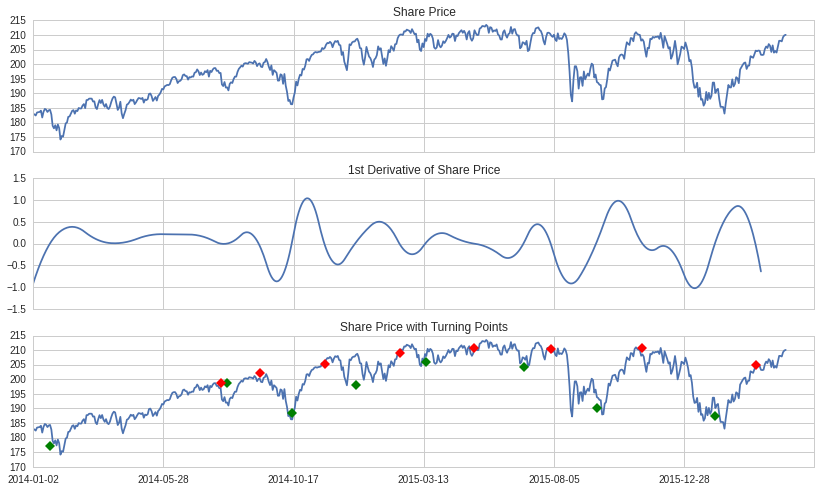

In [214]:
bottoms, tops = TurningPoints(asset, step_size=20, plot=True)

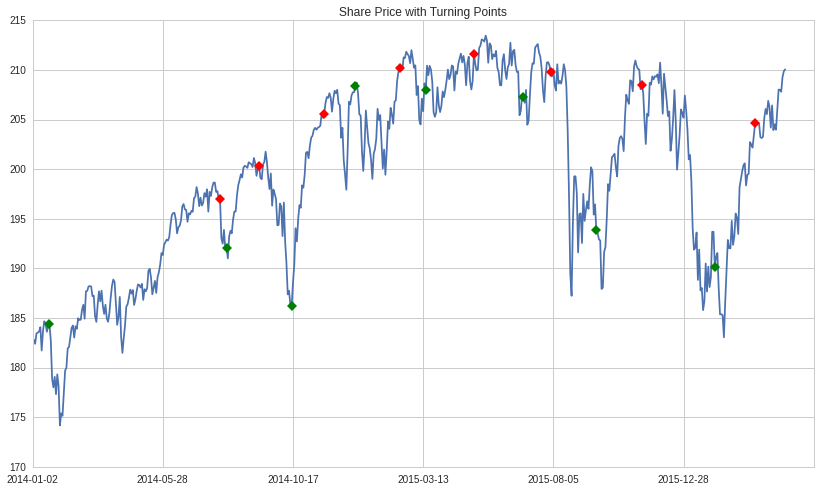

In [215]:
x = np.arange(0,len(asset))

_, ax = plt.subplots()
ax.plot(asset)
ticks = ax.get_xticks()
ax.set_xticklabels([dates[i].date() for i in ticks[:-1]]) # Label x-axis with dates
ax.set_title('Share Price with Turning Points')
ax.plot(x[bottoms], asset[bottoms], 'gD')
ax.plot(x[tops], asset[tops], 'rD')